# E3.A b)- Task

In [1]:
reset -f

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Math, Latex

## Define symbolic variables

In [3]:
L, q0, x  = sp.symbols('L, q0, x', real = 'True')
Ax, Ay, MAz = sp. symbols('Ax, Ay, MAz', real = 'True')

In [4]:
def q(xL,xH):
    return sp.integrate(q0, (x, xL, xH))

In [5]:
eq1 = sp.Eq(0 , Ax)
eq2 = sp.Eq(0 , Ay - q(0, L))
eq3 = sp.Eq(0, MAz - q(0, L)*L/2)

In [6]:
sol = sp.solve([eq1, eq2, eq3],[Ax, Ay, MAz])
sol

{Ax: 0, Ay: L*q0, MAz: L**2*q0/2}

In [7]:
Ax, Ay, MAz = sol.values()

# Internal force reactions

## Define symbolic functions

In [8]:
N = sp.Function('N')(x)
Q = sp.Function('Q')(x)
Mbz = sp.Function('Mbz')(x) 

## Set up equations

In [9]:
eq11 = sp.Eq(0, N + Ax) 
eq12 = sp.Eq(0, Q + Ay)
eq13 = sp.Eq(0, Mbz + MAz - Ay*x + q(0, x)*x/2)

# solve equations

In [10]:
sol = sp.solve([eq11, eq12, eq13],[N, Q, Mbz])
sol

{N(x): 0, Q(x): -L*q0, Mbz(x): -L**2*q0/2 + L*q0*x - q0*x**2/2}

In [11]:
N, Q, Mbz = sol.values()

# Stress

In [12]:
E, h, b, y = sp.symbols('E, h, b,y', real = 'True')

In [13]:
Iz = b*h**3/12

In [14]:
sigma = -Mbz/Iz * y
display(sigma.subs([(x,0),(y,h/2)]))

3*L**2*q0/(b*h**2)

# Deformation

In [15]:
v = sp.Function('v')

In [16]:
eq = sp.Eq(sp.diff(v(x),x,x), Mbz/(E*Iz))
display(eq)

Eq(Derivative(v(x), (x, 2)), 12*(-L**2*q0/2 + L*q0*x - q0*x**2/2)/(E*b*h**3))

In [17]:
bc = {v(0):0, sp.diff(v(x),x).subs(x, 0):0}

In [19]:
sol = sp.dsolve(eq, ics = bc)
v = sol.rhs
display(sol)
display(sol.subs(x,L))

Eq(v(x), -3*L**2*q0*x**2/(E*b*h**3) + 2*L*q0*x**3/(E*b*h**3) - q0*x**4/(2*E*b*h**3))

Eq(v(L), -3*L**4*q0/(2*E*b*h**3))

In [20]:
v = v.subs([(L, 100), (h, 2), (b, 15), (E, 210000)])

In [21]:
v_fun = sp.lambdify((x ,q0), v, 'numpy')
s = np.arange(0,100,1)

Text(0, 0.5, 'v(x)')

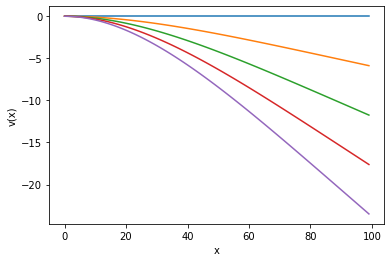

In [23]:
plt.plot(s, v_fun(s,0))
plt.plot(s, v_fun(s,1))
plt.plot(s, v_fun(s,2))
plt.plot(s, v_fun(s,3))
plt.plot(s, v_fun(s,4))
plt.xlabel('x')
plt.ylabel('v(x)')